In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datafile = "../data/raw_data/ICU_230713_mod.xlsx"
raw_static=pd.read_excel(datafile, sheet_name = '환자별 정보내역')
print(raw_static.columns)

DROPREF=False

vital_icu_mv=pd.read_excel(datafile, sheet_name = '인공호흡처방_임상관찰데이터').rename(columns={"대체번호": "pid"})
vital_icu_nmv=pd.read_excel(datafile, sheet_name = '인공호흡미처방_임상관찰데이터').rename(columns={"대체번호": "pid"})
blood_icu_mv=pd.read_excel(datafile, sheet_name = '인공호흡처방_혈액데이터').rename(columns={"대체번호": "pid"})
blood_icu_nmv=pd.read_excel(datafile, sheet_name = '인공호흡미처방_혈액데이터').rename(columns={"대체번호": "pid"})

vital_icu_mv['pid'] = vital_icu_mv['pid'].fillna(method='ffill').astype(str).apply(lambda x: int(x, 36))
vital_icu_nmv['pid'] = vital_icu_nmv['pid'].fillna(method='ffill').astype(str).apply(lambda x: int(x, 36))
blood_icu_mv['pid'] = blood_icu_mv['pid'].fillna(method='ffill').astype(str).apply(lambda x: int(x, 36))
blood_icu_nmv['pid'] = blood_icu_nmv['pid'].fillna(method='ffill').astype(str).apply(lambda x: int(x, 36))

print(blood_icu_mv.columns)
blood_icu_mv

Index(['환자대체번호', '중환자실입원일', '중환자실퇴원일', '입원일', '퇴원일', '키', '체중', '나이', '성별',
       'OTAL APACHE-II score', 'SOFA', 'SAPS3', '인공호흡첫처방', '인공호흡마지막처방',
       '인공호흡처방일수', '인공호흡처방코드'],
      dtype='object')
Index(['pid', '중환자실입실날짜', '인공호흡첫처방일자', '순번', 'Hb측정시간', 'Hb', 'Hct측정시간', 'Hct',
       'RBC Count측정시간', 'RBC Count', 'MCV측정시간', 'MCV', 'MCH측정시간', 'MCH',
       'MCHC측정시간', 'MCHC', 'WBC Count측정시간', 'WBC Count', 'PLT Count측정시간',
       'PLT Count', 'ABGA◇pH-응급측정시간', 'ABGA◇pH-응급', 'ABGA◇PCO2-응급-측정시간',
       'ABGA◇PCO2-응급-', 'ABGA◇PO2-응급-측정시간', 'ABGA◇PO2-응급-',
       'ABGA◇HCO3-응급-측정시간', 'ABGA◇HCO3-응급-', 'ABGA◇BEvv-응급-측정시간',
       'ABGA◇BEvv-응급-', 'ABGA◇O2sat-응급-측정시간', 'ABGA◇O2sat-응급-',
       'ABGA◇FiO2-응급-측정시간', 'ABGA◇FiO2-응급-', 'ABGA◇PF ratio측정시간',
       'ABGA◇PF ratio'],
      dtype='object')


,pid,중환자실입실날짜,인공호흡첫처방일자,순번,Hb측정시간,Hb,Hct측정시간,Hct,RBC Count측정시간,RBC Count,...,ABGA◇HCO3-응급-측정시간,ABGA◇HCO3-응급-,ABGA◇BEvv-응급-측정시간,ABGA◇BEvv-응급-,ABGA◇O2sat-응급-측정시간,ABGA◇O2sat-응급-,ABGA◇FiO2-응급-측정시간,ABGA◇FiO2-응급-,ABGA◇PF ratio측정시간,ABGA◇PF ratio
0,806512563765,2022-02-02,2022-02-02,1,2022-02-02 08:28:16,13.9,2022-02-02 08:28:16,41.3,2022-02-02 08:28:16,4.48,...,2022-02-02 15:22:41,13.3,2022-02-02 15:22:41,-11.6,2022-02-02 15:22:41,97.6,2022-02-02 15:22:41,21.0,2022-02-02 15:22:41,525.9
1,806512563765,NaN,NaN,2,2022-02-02 15:58:20,11.1,2022-02-02 15:58:20,35.1,2022-02-02 15:58:20,3.53,...,2022-02-02 15:48:48,13.4,2022-02-02 15:48:48,-16.7,2022-02-02 15:48:48,90.6,2022-02-02 15:48:49,100.0,2022-02-02 15:48:48,87.1
2,806512563765,NaN,NaN,3,2022-02-02 18:40:50,12.0,2022-02-02 18:40:50,36.6,2022-02-02 18:40:50,3.83,...,2022-02-02 18:27:42,23.0,2022-02-02 18:27:42,-4.0,2022-02-02 18:27:42,99.9,2022-02-02 18:27:42,100.0,2022-02-02 18:27:42,323.3
3,806512563765,NaN,NaN,4,2022-02-03 05:03:05,8.9,2022-02-03 05:03:05,25.4,2022-02-03 05:03:05,2.76,...,2022-02-02 18:36:17,20.8,2022-02-02 18:36:17,-4.7,2022-02-02 18:36:17,98.8,2022-02-02 18:36:17,60.0,2022-02-02 18:36:17,225.3
4,806512563765,NaN,NaN,5,2022-02-03 14:50:13,9.9,2022-02-03 14:50:13,28.5,2022-02-03 14:50:14,3.18,...,2022-02-02 19:43:54,19.3,2022-02-02 19:43:54,-4.0,2022-02-02 19:43:54,98.2,2022-02-02 19:43:54,40.0,2022-02-02 19:43:54,264.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,833994756532,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-06-21 21:22:56,22.3,2022-06-21 21:22:56,-3.3,2022-06-21 21:22:56,94.8,2022-06-21 21:22:57,50.0,2022-06-21 21:22:57,165.7
2294,833994756532,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-06-21 22:05:59,21.9,2022-06-21 22:05:59,-3.2,2022-06-21 22:05:59,93.5,2022-06-21 22:05:59,45.0,2022-06-21 22:05:59,164.5
2295,833994756532,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-06-21 22:59:15,22.6,2022-06-21 22:59:15,-3.5,2022-06-21 22:59:15,89.7,2022-06-21 22:59:16,48.0,2022-06-21 22:59:15,137.5
2296,833994756532,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-06-21 23:56:53,21.9,2022-06-21 23:56:53,-4.1,2022-06-21 23:56:53,91.6,2022-06-21 23:56:53,80.0,2022-06-21 23:56:53,89.2


In [2]:
static_ = raw_static[['환자대체번호','중환자실입원일','중환자실퇴원일','나이','성별', '인공호흡첫처방', '인공호흡처방코드']].copy()
static_.columns = ['pid','icu_in','icu_out','age','gender','MV_time','MV_code']
static_ = static_.drop_duplicates()
static_

static_['pid'] = static_['pid'].astype(str).apply(lambda x: int(x, 36))
static_['icu_in']=static_['icu_in'].astype('datetime64')
static_['icu_out']=static_['icu_out'].astype('datetime64')
static_['MV_time']= pd.to_datetime(static_['MV_time'])
static_.loc[:, 'intime'] = static_['icu_in'].apply(lambda x : x.hour)

#filter row with mv code but no mv time ( 10 patients)
# == admission with mv 
static_.loc[:,'IHMV']= ~pd.isnull(static_['MV_time'])
static_['MV_code']= ~pd.isnull(static_['MV_code'])
static_ = static_[static_['MV_code']==static_['IHMV']]
static_.drop(labels='MV_code',axis=1,inplace=True)
static_['los'] = static_['icu_out'] - static_['icu_in']

t=~pd.isnull(static_['MV_time'])
static_['MV_time_'] = np.nan
static_['MV_time_'][t] = (static_['MV_time'][t] - static_['icu_in'][t]).astype('timedelta64[h]')
static = static_

/tmp/ipykernel_446976/2807574488.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  static_['MV_time_'][t] = (static_['MV_time'][t] - static_['icu_in'][t]).astype('timedelta64[h]')


In [3]:
static_['gender'].unique()

array(['F', 'M'], dtype=object)

In [4]:
static_to_keep = static_[['pid','age','icu_in','intime','gender']].copy()
static_to_keep = pd.get_dummies(static_to_keep, columns = ['gender'])
static_to_keep.sort_values(by=['pid'],inplace = True)

static_to_keep['pid']=static_to_keep['pid'].round(0).astype(int)
static_to_keep

,pid,age,icu_in,intime,gender_F,gender_M
236,783782600225,40,2022-04-18,0,0,1
152,783898345708,73,2022-03-17,0,0,1
279,784056247248,76,2022-05-11,0,0,1
30,784186567732,29,2022-01-17,0,0,1
168,784354293115,84,2022-03-22,0,0,1
...,...,...,...,...,...,...
198,860901252249,40,2022-04-01,0,0,1
321,861129351784,74,2022-05-27,0,0,1
3,861147754450,62,2022-01-03,0,1,0
28,861251454489,35,2022-01-14,0,1,0


In [5]:
df = pd.concat([vital_icu_mv,vital_icu_nmv])

_vital = ['HR', 'RR', 'SBP', 'DBP', 'SpO2', 'BT']

# Let's separate into different dataframes, one for each feature
df_hr = df[["pid","HR측정시간", "HR수치"]].rename(columns={"HR측정시간": "time", "HR수치": "HR"}).dropna()
df_rr = df[["pid","RR측정시간", "RR수치"]].rename(columns={"RR측정시간": "time", "RR수치": "RR"}).dropna()
df_sbp = df[["pid","SBP측정시간", "SBP수치"]].rename(columns={"SBP측정시간": "time", "SBP수치": "SBP"}).dropna()
df_dbp = df[["pid","DBP측정시간", "DBP수치"]].rename(columns={"DBP측정시간": "time", "DBP수치": "DBP"}).dropna()
df_spo2 = df[["pid","SpO2측정시간", "SpO2수치"]].rename(columns={"SpO2측정시간": "time", "SpO2수치": "SpO2"}).dropna()
df_bt = df[["pid","BT측정시간", "BT수치"]].rename(columns={"BT측정시간": "time", "BT수치": "BT"}).dropna()

df_hr['time']=pd.to_datetime(df_hr['time'])
df_rr['time']=pd.to_datetime(df_rr['time'])
df_sbp['time']=pd.to_datetime(df_sbp['time'])
df_dbp['time']=pd.to_datetime(df_dbp['time'])
df_spo2['time']=pd.to_datetime(df_spo2['time'])
df_bt['time']=pd.to_datetime(df_bt['time'])

df_combined = df_hr.merge(df_rr, on=['pid','time'], how='outer')
df_combined = df_combined.merge(df_sbp, on=['pid','time'], how='outer')
df_combined = df_combined.merge(df_dbp, on=['pid','time'], how='outer')
df_combined = df_combined.merge(df_spo2, on=['pid','time'], how='outer')
df_combined = df_combined.merge(df_bt, on=['pid','time'], how='outer')
df_combined.sort_values(by=['pid','time'],inplace=True)

vital = df_combined
vital.columns = ['pid','time','hr', 'rr', 'sbp', 'dbp', 'spo2', 'temp']
vital = vital[['pid','time','rr','hr','spo2','sbp','dbp','temp']]
vital 

,pid,time,rr,hr,spo2,sbp,dbp,temp
18959,783782600225,2022-04-18 00:00:00,11.0,79.0,98.0,92.0,60.0,NaN
18960,783782600225,2022-04-18 01:00:00,13.0,81.0,99.0,96.0,63.0,NaN
18961,783782600225,2022-04-18 02:00:00,11.0,82.0,98.0,92.0,61.0,NaN
18962,783782600225,2022-04-18 03:00:00,12.0,82.0,97.0,103.0,67.0,NaN
18963,783782600225,2022-04-18 04:00:00,13.0,85.0,98.0,98.0,66.0,NaN
...,...,...,...,...,...,...,...,...
3344,861322729011,2022-03-21 20:00:00,25.0,52.0,NaN,126.0,69.0,13.1
3345,861322729011,2022-03-21 21:00:00,28.0,51.0,NaN,116.0,71.0,13.1
3346,861322729011,2022-03-21 22:00:00,26.0,50.0,NaN,123.0,69.0,13.1
3347,861322729011,2022-03-21 23:00:00,24.0,49.0,NaN,130.0,77.0,34.6


In [6]:
df = pd.concat([blood_icu_mv,blood_icu_nmv])

# Let's separate into different dataframes, one for each feature

_cbc = ["Hb", "Hct", "RBC Count", "MCV", "MCH", "MCHC", "WBC Count", "PLT Count"]
dataframes = []

for col in _cbc:
    df_temp = df[["pid", f"{col}측정시간", col]].rename(columns={f"{col}측정시간": "time", col: col}).dropna()
    df_temp['time'] = pd.to_datetime(df_temp['time'])
    dataframes.append(df_temp)

df_combined = dataframes[0]
for df in dataframes[1:]:
    df_combined = df_combined.merge(df, on=['pid','time'], how='outer')

df_combined.sort_values(by=['pid','time'],inplace=True)

CBC = df_combined
CBC.columns = ['pid','time','hb','hct','rbc','mcv','mch','mchc','wbc','platelets']
CBC = CBC[['pid','time','hct','hb','platelets','wbc','rbc','mch','mchc','mcv']]
CBC

,pid,time,hct,hb,platelets,wbc,rbc,mch,mchc,mcv
2056,783782600225,2022-04-18 20:07:33,25.7,9.0,45.0,3.31,2.88,31.3,35.0,89.2
2057,783782600225,2022-04-19 04:50:37,22.4,7.8,NaN,NaN,NaN,NaN,NaN,NaN
2937,783782600225,2022-04-19 04:50:38,NaN,NaN,50.0,2.48,2.49,31.3,34.8,90.0
2058,783782600225,2022-04-19 15:50:39,21.8,7.7,41.0,2.20,2.41,32.0,35.3,90.5
2059,783782600225,2022-04-20 04:32:13,NaN,7.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
372,861322729011,2022-03-21 05:13:09,28.5,9.2,26.0,18.25,3.12,29.5,32.3,91.3
373,861322729011,2022-03-21 19:21:55,32.2,10.5,35.0,19.71,3.49,30.1,32.6,92.3
374,861322729011,2022-03-22 04:37:36,31.3,10.0,NaN,NaN,3.41,NaN,NaN,NaN
2977,861322729011,2022-03-22 04:37:37,NaN,NaN,32.0,15.60,NaN,29.3,31.9,91.8


In [7]:
df = pd.concat([blood_icu_mv,blood_icu_nmv])
df.columns = [col.replace('ABGA◇', '').replace('-', '').replace('응급', '') for col in df.columns]

# Let's separate into different dataframes, one for each feature

_abga = ['pH', 'PCO2', 'PO2', 'HCO3', 'BEvv', 'O2sat', 'FiO2', 'PF ratio']
dataframes = []

for col in _abga:
    df_temp = df[["pid", f"{col}측정시간", col]].rename(columns={f"{col}측정시간": "time", col: col}).dropna()
    df_temp['time'] = pd.to_datetime(df_temp['time'])
    dataframes.append(df_temp)

df_combined = dataframes[0]
for df in dataframes[1:]:
    df_combined = df_combined.merge(df, on=['pid','time'], how='outer')

df_combined.sort_values(by=['pid','time'],inplace=True)
abga = df_combined
abga.drop(['BEvv'], axis=1, inplace=True)
abga.columns = ['pid','time','ph','pco2', 'po2','hco3','sao2','fio2','pfratio']
abga = abga[['pid','time','ph','hco3', 'po2','pco2','sao2','fio2','pfratio']]
abga

,pid,time,ph,hco3,po2,pco2,sao2,fio2,pfratio
3528,783782600225,2022-04-18 19:42:33,7.398,16.0,92.7,25.8,97.4,21.0,443.5
3529,783782600225,2022-04-19 06:35:11,7.405,16.7,85.2,26.5,96.7,21.0,407.6
3530,783782600225,2022-04-20 06:31:33,7.411,16.4,87.9,25.6,97.1,21.0,420.4
3083,783898345708,2022-03-18 06:30:02,7.368,18.3,78.6,31.4,95.3,21.0,376.0
3084,783898345708,2022-03-19 19:39:39,7.520,19.4,89.2,23.5,98.0,30.0,297.4
...,...,...,...,...,...,...,...,...,...
3654,861251454489,2022-01-18 19:05:29,7.515,21.5,64.8,26.4,94.7,20.0,323.9
1020,861322729011,2022-03-21 06:53:20,7.306,22.6,87.5,44.9,95.6,25.0,350.1
1021,861322729011,2022-03-21 16:53:33,7.371,25.1,89.4,43.0,96.6,25.0,357.6
1022,861322729011,2022-03-22 08:41:40,7.292,23.3,95.1,47.8,96.4,25.0,380.5


In [8]:
_vital = ['rr','hr','spo2','sbp','dbp','temp']
_CBC = ['hct','hb','platelets','wbc','rbc','mch','mchc','mcv']
_ABGA = ['ph','hco3', 'po2','pco2','sao2','fio2','pfratio']
cols = _vital+_CBC+_ABGA

raw_ts = vital.merge(CBC, on=['pid','time'], how='outer')
raw_ts = raw_ts.merge(abga, on=['pid','time'], how='outer')
raw_ts.sort_values(by=['pid','time'],inplace=True)
raw_ts



,pid,time,rr,hr,spo2,sbp,dbp,temp,hct,hb,...,mch,mchc,mcv,ph,hco3,po2,pco2,sao2,fio2,pfratio
0,783782600225,2022-04-18 00:00:00,11.0,79.0,98.0,92.0,60.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,783782600225,2022-04-18 01:00:00,13.0,81.0,99.0,96.0,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,783782600225,2022-04-18 02:00:00,11.0,82.0,98.0,92.0,61.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,783782600225,2022-04-18 03:00:00,12.0,82.0,97.0,103.0,67.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,783782600225,2022-04-18 04:00:00,13.0,85.0,98.0,98.0,66.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30873,861322729011,2022-03-22 04:37:36,NaN,NaN,NaN,NaN,NaN,NaN,31.3,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30874,861322729011,2022-03-22 04:37:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.3,31.9,91.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35254,861322729011,2022-03-22 08:41:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.292,23.3,95.1,47.8,96.4,25.0,380.5
35255,861322729011,2022-03-22 16:33:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.328,22.3,92.9,42.1,96.6,25.0,371.6


In [9]:
X = pd.merge(left = static_to_keep[['pid','icu_in']], right = raw_ts, how = "inner", on='pid')

#date to hours_in
X.insert(1,'hours_in','')
X['hours_in'] = (X['time'] - X['icu_in']).astype('timedelta64[h]')+1
X.drop(['icu_in','time'], axis=1, inplace=True)
X

,pid,hours_in,rr,hr,spo2,sbp,dbp,temp,hct,hb,...,mch,mchc,mcv,ph,hco3,po2,pco2,sao2,fio2,pfratio
0,783782600225,1.0,11.0,79.0,98.0,92.0,60.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,783782600225,2.0,13.0,81.0,99.0,96.0,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,783782600225,3.0,11.0,82.0,98.0,92.0,61.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,783782600225,4.0,12.0,82.0,97.0,103.0,67.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,783782600225,5.0,13.0,85.0,98.0,98.0,66.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36328,861322729011,29.0,NaN,NaN,NaN,NaN,NaN,NaN,31.3,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36329,861322729011,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.3,31.9,91.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36330,861322729011,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.292,23.3,95.1,47.8,96.4,25.0,380.5
36331,861322729011,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.328,22.3,92.9,42.1,96.6,25.0,371.6


<AxesSubplot:>

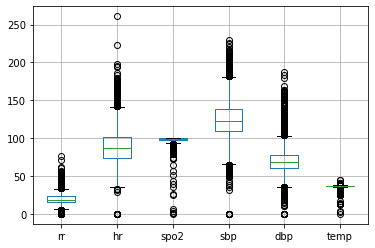

In [10]:
# save raw data (no imputation & no outlier removal)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X_raw= X.copy()
X_raw[_vital].boxplot()

In [11]:
print(X.dtypes)

pid            int64
hours_in     float64
rr           float64
hr           float64
spo2         float64
sbp          float64
dbp          float64
temp         float64
hct          float64
hb           float64
platelets    float64
wbc          float64
rbc          float64
mch          float64
mchc         float64
mcv          float64
ph           float64
hco3         float64
po2          float64
pco2         float64
sao2         float64
fio2         float64
pfratio      float64
dtype: object


In [12]:
#delete outlier
outlier_range = {}
outlier_range['rr']=[0,375]
outlier_range['hr']=[0,390]
outlier_range['spo2']=[0,150]
outlier_range['sbp']=[0,375]
outlier_range['dbp']=[0,375]
outlier_range['temp']=[14.2,47]

outlier_range['hct']=[0,100]
outlier_range['hb']=[0,30]
outlier_range['platelets']=[0,2200]
outlier_range['wbc']=[0,1100]

outlier_range['ph']=[0,10]
outlier_range['po2']=[0,770]
outlier_range['pco2']=[0,220]
outlier_range['sao2']=[0,150]
outlier_range['fio2']=[20,110]

for i in outlier_range.keys():
    print(i)
    X.mask(X[i]<outlier_range[i][0], inplace = True)
    X.mask(X[i]>outlier_range[i][1], inplace = True)
# change fio2 scale
X['fio2'] = X['fio2']/100
X.describe()

rr
hr
spo2
sbp
dbp
temp
hct
hb
platelets
wbc
ph
po2
pco2
sao2
fio2


,pid,hours_in,rr,hr,spo2,sbp,dbp,temp,hct,hb,...,mch,mchc,mcv,ph,hco3,po2,pco2,sao2,fio2,pfratio
count,3.610500e+04,36105.000000,27274.000000,26597.000000,20154.000000,27512.000000,27511.000000,21962.000000,2736.000000,2736.000000,...,2736.000000,2712.000000,2736.000000,4081.000000,4074.000000,4079.000000,4080.000000,4066.000000,3956.000000,3955.000000
mean,8.237096e+11,103.795762,20.169649,88.280784,97.863948,123.626527,70.795136,36.651794,29.012825,9.600669,...,30.598388,33.132533,92.469722,7.392254,22.535641,97.286198,37.413603,95.152263,0.441572,278.207788
std,2.324976e+10,263.532405,5.994663,19.945507,3.296290,21.251903,14.555175,0.922891,6.417870,2.141725,...,2.051555,1.326817,5.758176,0.106420,5.865311,51.125641,13.966793,5.278923,0.242127,182.128250
min,7.837826e+11,-1727.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,10.000000,3.300000,...,19.900000,28.100000,70.300000,6.770000,3.100000,25.700000,8.500000,27.600000,0.200000,29.600000
25%,8.022263e+11,30.000000,16.000000,74.000000,97.000000,109.000000,61.000000,36.300000,24.300000,8.000000,...,29.500000,32.300000,88.800000,7.346000,18.900000,70.700000,28.700000,93.800000,0.210000,147.700000
50%,8.243536e+11,61.000000,19.000000,87.000000,99.000000,123.000000,69.000000,36.700000,27.900000,9.300000,...,30.600000,33.200000,92.400000,7.417000,22.200000,83.800000,34.000000,96.400000,0.360000,250.500000
75%,8.439641e+11,130.000000,23.000000,101.000000,100.000000,138.000000,78.000000,37.100000,32.600000,10.800000,...,31.800000,34.000000,95.800000,7.463000,25.600000,103.950000,42.100000,98.100000,0.600000,368.150000
max,8.613227e+11,1969.000000,76.000000,261.000000,100.000000,229.000000,187.000000,45.000000,62.200000,20.500000,...,40.300000,38.500000,124.000000,7.704000,50.600000,535.900000,158.800000,100.000000,1.000000,2234.200000


In [13]:
reference_value = {      # average
#vital
    'rr': 16,           # 19.75339
    'hr':80,            # 86.15997
    'spo2': 97,      # 90.743683
    'sbp':110,          # 122.7326
    'dbp':70,           # 60.76322
    'temp':36.5,        # 37.0867
#CBC
    'hct': 41.5,        # 30.491288
    'hb': 13.5,         # 10.396213
    'platelets':275,    # 219.158934
    'wbc': 7,           # 12.412393
    'rbc': 4.45,        # 3.454153
    'mch': 29.5,        # 30.333704
    'mchc': 33.25,      # 33.850937
    'mcv': 90,          # 89.702025
#ABGA
    'ph': 7.4,          # 7.388153
    'hco3': 24,         # 24.595758
    'po2': 87.5,        # 130.492106
    'pco2': 40,         # 41.616208
    'sao2': 97,     # 97.09498
    'fio2' : 0.21,       # 0.512136
    'pfratio': 87.5 / 0.21
}

#extract aggregate value per hour
X_ = X.groupby(['pid'] + ['hours_in']).agg(['mean', 'first','min','max'])
print(X.columns)

print(X_.isna().sum().sum())


if DROPREF:
    print("DROPREF")
    print(X_.shape)
    print(X_.isna().sum().sum())
    X_=X_.groupby(['pid'] ).fillna(method='ffill')
    print(X_.isna().sum().sum())
    X_=X_.dropna(axis=0,thresh=23-5)
    print(X_.isna().sum().sum())
    print(X_.shape)
else:
    X_=X_.groupby(['pid'] ).fillna(method='ffill').groupby(['pid'] ).fillna(method='bfill')
# X_=X_.groupby(['pid'] ).fillna(method='ffill').groupby(['pid'] ).fillna(method='bfill',limit=6)
# X_=X_.groupby(['pid'] ).fillna(method='ffill')
print(X_.isna().sum().sum())
X_.fillna(
    pd.Series(X_.columns.get_level_values(0).map(reference_value.get), X_.columns), inplace=True
)
print(X_.isna().sum().sum())
X_

Index(['pid', 'hours_in', 'rr', 'hr', 'spo2', 'sbp', 'dbp', 'temp', 'hct',
       'hb', 'platelets', 'wbc', 'rbc', 'mch', 'mchc', 'mcv', 'ph', 'hco3',
       'po2', 'pco2', 'sao2', 'fio2', 'pfratio'],
      dtype='object')
1653840
114468
0


rr                      hr                    spo2  \
                       mean first   min   max  mean first   min   max  mean   
pid          hours_in                                                         
7.837826e+11 1.0       11.0  11.0  11.0  11.0  79.0  79.0  79.0  79.0  98.0   
             2.0       13.0  13.0  13.0  13.0  81.0  81.0  81.0  81.0  99.0   
             3.0       11.0  11.0  11.0  11.0  82.0  82.0  82.0  82.0  98.0   
             4.0       12.0  12.0  12.0  12.0  82.0  82.0  82.0  82.0  97.0   
             5.0       13.0  13.0  13.0  13.0  85.0  85.0  85.0  85.0  98.0   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
8.613227e+11 25.0      20.0  20.0  20.0  20.0  49.0  49.0  49.0  49.0  97.0   
             29.0      20.0  20.0  20.0  20.0  49.0  49.0  49.0  49.0  97.0   
             33.0      20.0  20.0  20.0  20.0  49.0  49.0  49.0  49.0  97.0   
             41.0      20.0  20.0  20.0  20.0  49.0  49.0  49.0  49.0  97.0   
             42.0      20.0  20.0  20.0  20.0  49.0  49.0  49.0  49.0  97.0   

                             ...  sao2        fio2                   pfratio  \
                      first  ...   min   max  mean first   min   max    mean   
pid          hours_in        ...                                               
7.837826e+11 1.0       98.0  ...  97.4  97.4  0.21  0.21  0.21  0.21   443.5   
             2.0       99.0  ...  97.4  97.4  0.21  0.21  0.21  0.21   443.5   
             3.0       98.0  ...  97.4  97.4  0.21  0.21  0.21  0.21   443.5   
             4.0       97.0  ...  97.4  97.4  0.21  0.21  0.21  0.21   443.5   
             5.0       98.0  ...  97.4  97.4  0.21  0.21  0.21  0.21   443.5   
...                     ...  ...   ...   ...   ...   ...   ...   ...     ...   
8.613227e+11 25.0      97.0  ...  96.6  96.6  0.25  0.25  0.25  0.25   357.6   
             29.0      97.0  ...  96.6  96.6  0.25  0.25  0.25  0.25   357.6   
             33.0      97.0  ...  96.4  96.4  0.25  0.25  0.25  0.25   380.5   
             41.0      97.0  ...  96.6  96.6  0.25  0.25  0.25  0.25   371.6   
             42.0      97.0  ...  96.6  96.6  0.25  0.25  0.25  0.25   371.6   

                                            
                       first    min    max  
pid          hours_in                       
7.837826e+11 1.0       443.5  443.5  443.5  
             2.0       443.5  443.5  443.5  
             3.0       443.5  443.5  443.5  
             4.0       443.5  443.5  443.5  
             5.0       443.5  443.5  443.5  
...                      ...    ...    ...  
8.613227e+11 25.0      357.6  357.6  357.6  
             29.0      357.6  357.6  357.6  
             33.0      380.5  380.5  380.5  
             41.0      371.6  371.6  371.6  
             42.0      371.6  371.6  371.6  

[28843 rows x 84 columns]

In [14]:
X_=X_.reset_index()
X_ = X_[X_['hours_in']>=0] # remove observation before ICU admission
X_ = X_[X_['hours_in']<=240] # maximum, 10 days of stay

# filter patients with earlyexit ==> 7 patients removed
temp = X_
print(len(temp['pid'].reset_index(drop=True).unique()))
temp = temp.reset_index(drop=True).groupby('pid').filter(lambda x: (x.hours_in >= 6).any() )
print(len(temp['pid'].unique()))
X_ = temp 
X_ = X_.set_index(['pid','hours_in'])
X_


378
377


rr                      hr                    spo2  \
                       mean first   min   max  mean first   min   max  mean   
pid          hours_in                                                         
7.837826e+11 1.0       11.0  11.0  11.0  11.0  79.0  79.0  79.0  79.0  98.0   
             2.0       13.0  13.0  13.0  13.0  81.0  81.0  81.0  81.0  99.0   
             3.0       11.0  11.0  11.0  11.0  82.0  82.0  82.0  82.0  98.0   
             4.0       12.0  12.0  12.0  12.0  82.0  82.0  82.0  82.0  97.0   
             5.0       13.0  13.0  13.0  13.0  85.0  85.0  85.0  85.0  98.0   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
8.613227e+11 25.0      20.0  20.0  20.0  20.0  49.0  49.0  49.0  49.0  97.0   
             29.0      20.0  20.0  20.0  20.0  49.0  49.0  49.0  49.0  97.0   
             33.0      20.0  20.0  20.0  20.0  49.0  49.0  49.0  49.0  97.0   
             41.0      20.0  20.0  20.0  20.0  49.0  49.0  49.0  49.0  97.0   
             42.0      20.0  20.0  20.0  20.0  49.0  49.0  49.0  49.0  97.0   

                             ...  sao2        fio2                   pfratio  \
                      first  ...   min   max  mean first   min   max    mean   
pid          hours_in        ...                                               
7.837826e+11 1.0       98.0  ...  97.4  97.4  0.21  0.21  0.21  0.21   443.5   
             2.0       99.0  ...  97.4  97.4  0.21  0.21  0.21  0.21   443.5   
             3.0       98.0  ...  97.4  97.4  0.21  0.21  0.21  0.21   443.5   
             4.0       97.0  ...  97.4  97.4  0.21  0.21  0.21  0.21   443.5   
             5.0       98.0  ...  97.4  97.4  0.21  0.21  0.21  0.21   443.5   
...                     ...  ...   ...   ...   ...   ...   ...   ...     ...   
8.613227e+11 25.0      97.0  ...  96.6  96.6  0.25  0.25  0.25  0.25   357.6   
             29.0      97.0  ...  96.6  96.6  0.25  0.25  0.25  0.25   357.6   
             33.0      97.0  ...  96.4  96.4  0.25  0.25  0.25  0.25   380.5   
             41.0      97.0  ...  96.6  96.6  0.25  0.25  0.25  0.25   371.6   
             42.0      97.0  ...  96.6  96.6  0.25  0.25  0.25  0.25   371.6   

                                            
                       first    min    max  
pid          hours_in                       
7.837826e+11 1.0       443.5  443.5  443.5  
             2.0       443.5  443.5  443.5  
             3.0       443.5  443.5  443.5  
             4.0       443.5  443.5  443.5  
             5.0       443.5  443.5  443.5  
...                      ...    ...    ...  
8.613227e+11 25.0      357.6  357.6  357.6  
             29.0      357.6  357.6  357.6  
             33.0      380.5  380.5  380.5  
             41.0      371.6  371.6  371.6  
             42.0      371.6  371.6  371.6  

[26556 rows x 84 columns]

In [15]:
idx = pd.IndexSlice
X_worst = X_.loc[:,idx[:, ['min','max']]].copy()
cnt=0
for k in X_worst.columns:
    if k[0] == 'pfratio':
        X_worst[k[0],'worst'] = X_worst[k[0],'min']
        continue
    #for min, max calc distance from reference value
    cnt=cnt+1
    if cnt%2==0:
        continue
    
    ref = reference_value[k[0]]
    print(k,cnt,ref)
    min_diff = abs(X_worst[k[0],'min'] - reference_value[k[0]] )
    max_diff = abs(X_worst[k[0],'max'] - reference_value[k[0]] )
    
    X_worst[k[0],'worst'] = np.where(max_diff>min_diff,
                    X_worst[k[0],'max'], X_worst[k[0],'min'])

X_worst = X_worst.loc[:,idx[:, ['worst']]]
X_worst.columns = X_worst.columns.droplevel(-1)
X_worst

('rr', 'min') 1 16
('hr', 'min') 3 80
('spo2', 'min') 5 97
('sbp', 'min') 7 110
('dbp', 'min') 9 70
('temp', 'min') 11 36.5
('hct', 'min') 13 41.5


('hb', 'min') 15 13.5
('platelets', 'min') 17 275
('wbc', 'min') 19 7
('rbc', 'min') 21 4.45
('mch', 'min') 23 29.5
('mchc', 'min') 25 33.25
('mcv', 'min') 27 90
('ph', 'min') 29 7.4
('hco3', 'min') 31 24
('po2', 'min') 33 87.5
('pco2', 'min') 35 40
('sao2', 'min') 37 97
('fio2', 'min') 39 0.21


rr    hr  spo2    sbp   dbp  temp   hct    hb  \
pid          hours_in                                                    
7.837826e+11 1.0       11.0  79.0  98.0   92.0  60.0  36.5  25.7   9.0   
             2.0       13.0  81.0  99.0   96.0  63.0  36.5  25.7   9.0   
             3.0       11.0  82.0  98.0   92.0  61.0  36.5  25.7   9.0   
             4.0       12.0  82.0  97.0  103.0  67.0  36.5  25.7   9.0   
             5.0       13.0  85.0  98.0   98.0  66.0  36.5  25.7   9.0   
...                     ...   ...   ...    ...   ...   ...   ...   ...   
8.613227e+11 25.0      20.0  49.0  97.0  127.0  74.0  34.6  32.2  10.5   
             29.0      20.0  49.0  97.0  127.0  74.0  34.6  31.3  10.0   
             33.0      20.0  49.0  97.0  127.0  74.0  34.6  31.3  10.0   
             41.0      20.0  49.0  97.0  127.0  74.0  34.6  31.3  10.0   
             42.0      20.0  49.0  97.0  127.0  74.0  34.6  26.5   8.7   

                       platelets    wbc  ...   mch  mchc   mcv     ph  hco3  \
pid          hours_in                    ...                                  
7.837826e+11 1.0            45.0   3.31  ...  31.3  35.0  89.2  7.398  16.0   
             2.0            45.0   3.31  ...  31.3  35.0  89.2  7.398  16.0   
             3.0            45.0   3.31  ...  31.3  35.0  89.2  7.398  16.0   
             4.0            45.0   3.31  ...  31.3  35.0  89.2  7.398  16.0   
             5.0            45.0   3.31  ...  31.3  35.0  89.2  7.398  16.0   
...                          ...    ...  ...   ...   ...   ...    ...   ...   
8.613227e+11 25.0           35.0  19.71  ...  30.1  32.6  92.3  7.371  25.1   
             29.0           32.0  15.60  ...  29.3  31.9  91.8  7.371  25.1   
             33.0           32.0  15.60  ...  29.3  31.9  91.8  7.292  23.3   
             41.0           32.0  15.60  ...  29.3  31.9  91.8  7.328  22.3   
             42.0           37.0  13.18  ...  30.5  32.8  93.0  7.328  22.3   

                        po2  pco2  sao2  fio2  pfratio  
pid          hours_in                                   
7.837826e+11 1.0       92.7  25.8  97.4  0.21    443.5  
             2.0       92.7  25.8  97.4  0.21    443.5  
             3.0       92.7  25.8  97.4  0.21    443.5  
             4.0       92.7  25.8  97.4  0.21    443.5  
             5.0       92.7  25.8  97.4  0.21    443.5  
...                     ...   ...   ...   ...      ...  
8.613227e+11 25.0      89.4  43.0  96.6  0.25    357.6  
             29.0      89.4  43.0  96.6  0.25    357.6  
             33.0      95.1  47.8  96.4  0.25    380.5  
             41.0      92.9  42.1  96.6  0.25    371.6  
             42.0      92.9  42.1  96.6  0.25    371.6  

[26556 rows x 21 columns]

In [16]:
#split dataset --> mean / first / worst
def split_data(X,target):
    idx = pd.IndexSlice
    X_=X.loc[:,idx[cols, target]]
    X_.columns = X_.columns.droplevel(-1)
    X_.columns.name = None
    return X_
X_mean = split_data(X_,'mean')
X_first = split_data(X_,'first')

dataset = [X_worst,X_mean,X_first]

In [17]:
static_to_keep.drop(columns='icu_in',inplace=True)

In [18]:
#fillin pfratio
for idx, df in enumerate(dataset):
    # fillin pfratio
    df.loc[:,'pfratio'] = np.where(df.pfratio.isnull(), df.po2/df.fio2, df.pfratio )
    dataset[idx]=df
dataset[0]

/tmp/ipykernel_446976/2851134821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'pfratio'] = np.where(df.pfratio.isnull(), df.po2/df.fio2, df.pfratio )
/tmp/ipykernel_446976/2851134821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'pfratio'] = np.where(df.pfratio.isnull(), df.po2/df.fio2, df.pfratio )


rr    hr  spo2    sbp   dbp  temp   hct    hb  \
pid          hours_in                                                    
7.837826e+11 1.0       11.0  79.0  98.0   92.0  60.0  36.5  25.7   9.0   
             2.0       13.0  81.0  99.0   96.0  63.0  36.5  25.7   9.0   
             3.0       11.0  82.0  98.0   92.0  61.0  36.5  25.7   9.0   
             4.0       12.0  82.0  97.0  103.0  67.0  36.5  25.7   9.0   
             5.0       13.0  85.0  98.0   98.0  66.0  36.5  25.7   9.0   
...                     ...   ...   ...    ...   ...   ...   ...   ...   
8.613227e+11 25.0      20.0  49.0  97.0  127.0  74.0  34.6  32.2  10.5   
             29.0      20.0  49.0  97.0  127.0  74.0  34.6  31.3  10.0   
             33.0      20.0  49.0  97.0  127.0  74.0  34.6  31.3  10.0   
             41.0      20.0  49.0  97.0  127.0  74.0  34.6  31.3  10.0   
             42.0      20.0  49.0  97.0  127.0  74.0  34.6  26.5   8.7   

                       platelets    wbc  ...   mch  mchc   mcv     ph  hco3  \
pid          hours_in                    ...                                  
7.837826e+11 1.0            45.0   3.31  ...  31.3  35.0  89.2  7.398  16.0   
             2.0            45.0   3.31  ...  31.3  35.0  89.2  7.398  16.0   
             3.0            45.0   3.31  ...  31.3  35.0  89.2  7.398  16.0   
             4.0            45.0   3.31  ...  31.3  35.0  89.2  7.398  16.0   
             5.0            45.0   3.31  ...  31.3  35.0  89.2  7.398  16.0   
...                          ...    ...  ...   ...   ...   ...    ...   ...   
8.613227e+11 25.0           35.0  19.71  ...  30.1  32.6  92.3  7.371  25.1   
             29.0           32.0  15.60  ...  29.3  31.9  91.8  7.371  25.1   
             33.0           32.0  15.60  ...  29.3  31.9  91.8  7.292  23.3   
             41.0           32.0  15.60  ...  29.3  31.9  91.8  7.328  22.3   
             42.0           37.0  13.18  ...  30.5  32.8  93.0  7.328  22.3   

                        po2  pco2  sao2  fio2  pfratio  
pid          hours_in                                   
7.837826e+11 1.0       92.7  25.8  97.4  0.21    443.5  
             2.0       92.7  25.8  97.4  0.21    443.5  
             3.0       92.7  25.8  97.4  0.21    443.5  
             4.0       92.7  25.8  97.4  0.21    443.5  
             5.0       92.7  25.8  97.4  0.21    443.5  
...                     ...   ...   ...   ...      ...  
8.613227e+11 25.0      89.4  43.0  96.6  0.25    357.6  
             29.0      89.4  43.0  96.6  0.25    357.6  
             33.0      95.1  47.8  96.4  0.25    380.5  
             41.0      92.9  42.1  96.6  0.25    371.6  
             42.0      92.9  42.1  96.6  0.25    371.6  

[26556 rows x 21 columns]

In [19]:
#apply merge
for idx, df in enumerate(dataset):
    dataset[idx]= pd.merge(df.reset_index(), static_to_keep, on='pid')
dataset[0].head()

,pid,hours_in,rr,hr,spo2,sbp,dbp,temp,hct,hb,...,hco3,po2,pco2,sao2,fio2,pfratio,age,intime,gender_F,gender_M
0,7.837826e+11,1.0,11.0,79.0,98.0,92.0,60.0,36.5,25.7,9.0,...,16.0,92.7,25.8,97.4,0.21,443.5,40,0,0,1
1,7.837826e+11,2.0,13.0,81.0,99.0,96.0,63.0,36.5,25.7,9.0,...,16.0,92.7,25.8,97.4,0.21,443.5,40,0,0,1
2,7.837826e+11,3.0,11.0,82.0,98.0,92.0,61.0,36.5,25.7,9.0,...,16.0,92.7,25.8,97.4,0.21,443.5,40,0,0,1
3,7.837826e+11,4.0,12.0,82.0,97.0,103.0,67.0,36.5,25.7,9.0,...,16.0,92.7,25.8,97.4,0.21,443.5,40,0,0,1
4,7.837826e+11,5.0,13.0,85.0,98.0,98.0,66.0,36.5,25.7,9.0,...,16.0,92.7,25.8,97.4,0.21,443.5,40,0,0,1


In [20]:
# add absolute time feature
for idx, df in enumerate(dataset):
    abs_time = (df['intime'] + df['hours_in'])%24
    df.insert(2, 'absolute_time', abs_time)
    df.drop('intime', axis=1, inplace=True)
    dataset[idx]=df
dataset[0].head()

,pid,hours_in,absolute_time,rr,hr,spo2,sbp,dbp,temp,hct,...,ph,hco3,po2,pco2,sao2,fio2,pfratio,age,gender_F,gender_M
0,7.837826e+11,1.0,1.0,11.0,79.0,98.0,92.0,60.0,36.5,25.7,...,7.398,16.0,92.7,25.8,97.4,0.21,443.5,40,0,1
1,7.837826e+11,2.0,2.0,13.0,81.0,99.0,96.0,63.0,36.5,25.7,...,7.398,16.0,92.7,25.8,97.4,0.21,443.5,40,0,1
2,7.837826e+11,3.0,3.0,11.0,82.0,98.0,92.0,61.0,36.5,25.7,...,7.398,16.0,92.7,25.8,97.4,0.21,443.5,40,0,1
3,7.837826e+11,4.0,4.0,12.0,82.0,97.0,103.0,67.0,36.5,25.7,...,7.398,16.0,92.7,25.8,97.4,0.21,443.5,40,0,1
4,7.837826e+11,5.0,5.0,13.0,85.0,98.0,98.0,66.0,36.5,25.7,...,7.398,16.0,92.7,25.8,97.4,0.21,443.5,40,0,1


In [21]:
for i in range(3):
    print(len(dataset[i]['pid'].unique()))

377
377
377


In [22]:
# remove static with no data(X)
print(len(dataset[0]['pid'].unique()))
print(len(static_to_keep['pid'].unique()))
print(len(static['pid'].unique()))

pid_list = dataset[0]['pid'].unique()
static_to_keep=static_to_keep[static_to_keep['pid'].isin(pid_list)]
static=static[static['pid'].isin(pid_list)]

print(len(static_to_keep['pid'].unique()))
print(len(static['pid'].unique()))

377
378
378
377
377


In [23]:
static[static['pid']==806199878991]

,pid,icu_in,icu_out,age,gender,MV_time,intime,IHMV,los,MV_time_
327,806199878991,2022-05-29,2022-05-30,67,M,2022-05-29 08:58:00,0,True,1 days,8.0


In [24]:
for subject_id in static[static['IHMV']==True]['pid']:
    print('!!!!')
    print(f"{subject_id}=====static[static['pid']==subject_id]['MV_time_']")
    print()
    print(f"{static[static['pid']==subject_id]['MV_time_'].item()}")

!!!!
832867332308=====static[static['pid']==subject_id]['MV_time_']

89.0
!!!!
806169319716=====static[static['pid']==subject_id]['MV_time_']

11.0
!!!!
861147754450=====static[static['pid']==subject_id]['MV_time_']

47.0
!!!!
837174518890=====static[static['pid']==subject_id]['MV_time_']

17.0
!!!!
852169362399=====static[static['pid']==subject_id]['MV_time_']

181.0
!!!!
841247446936=====static[static['pid']==subject_id]['MV_time_']

15.0
!!!!
818525872940=====static[static['pid']==subject_id]['MV_time_']

25.0
!!!!
785623118895=====static[static['pid']==subject_id]['MV_time_']

20.0
!!!!
801488895526=====static[static['pid']==subject_id]['MV_time_']

25.0
!!!!
844541650414=====static[static['pid']==subject_id]['MV_time_']

19.0
!!!!
792317666841=====static[static['pid']==subject_id]['MV_time_']

24.0
!!!!
819018054888=====static[static['pid']==subject_id]['MV_time_']

863.0
!!!!
784186567732=====static[static['pid']==subject_id]['MV_time_']

16.0
!!!!
836101505701=====static[static[

In [25]:
#filter observation after MV
for idx, df in enumerate(dataset):
    for subject_id in static[static['IHMV']==True]['pid']:
        vent_time = static[static['pid']==subject_id]['MV_time_'].item()
        if(vent_time <6):
            df = df.loc[df['pid']!=subject_id]
        else:
            df = df.drop(df[(df['pid']==subject_id) & (df['hours_in'] >= vent_time)].index)
    dataset[idx]=df
    print(dataset[idx].shape)

pid_list = dataset[0]['pid'].unique()
static_to_keep=static_to_keep[static_to_keep['pid'].isin(pid_list)]
static=static[static['pid'].isin(pid_list)]

dataset[0].head()

(24332, 27)
(24332, 27)
(24332, 27)


,pid,hours_in,absolute_time,rr,hr,spo2,sbp,dbp,temp,hct,...,ph,hco3,po2,pco2,sao2,fio2,pfratio,age,gender_F,gender_M
0,7.837826e+11,1.0,1.0,11.0,79.0,98.0,92.0,60.0,36.5,25.7,...,7.398,16.0,92.7,25.8,97.4,0.21,443.5,40,0,1
1,7.837826e+11,2.0,2.0,13.0,81.0,99.0,96.0,63.0,36.5,25.7,...,7.398,16.0,92.7,25.8,97.4,0.21,443.5,40,0,1
2,7.837826e+11,3.0,3.0,11.0,82.0,98.0,92.0,61.0,36.5,25.7,...,7.398,16.0,92.7,25.8,97.4,0.21,443.5,40,0,1
3,7.837826e+11,4.0,4.0,12.0,82.0,97.0,103.0,67.0,36.5,25.7,...,7.398,16.0,92.7,25.8,97.4,0.21,443.5,40,0,1
4,7.837826e+11,5.0,5.0,13.0,85.0,98.0,98.0,66.0,36.5,25.7,...,7.398,16.0,92.7,25.8,97.4,0.21,443.5,40,0,1


In [26]:
# 6시간 미만 체류 환자 제거
# ku-covid, ku-icu ==> 6시간보다 작은 환자 존재
for idx, df in enumerate(dataset):
    print(dataset[idx].shape)
    df = df.groupby('pid').filter(lambda x: x.shape[0] >= 6)
    ids = df['pid'].unique()
    static =static[static['pid'].isin(ids)]
    static_to_keep =static_to_keep[static_to_keep['pid'].isin(ids)]
    dataset[idx] = df
    print(dataset[idx].shape)

dataset[0].head()


(24332, 27)
(24192, 27)
(24332, 27)
(24192, 27)
(24332, 27)
(24192, 27)


,pid,hours_in,absolute_time,rr,hr,spo2,sbp,dbp,temp,hct,...,ph,hco3,po2,pco2,sao2,fio2,pfratio,age,gender_F,gender_M
0,7.837826e+11,1.0,1.0,11.0,79.0,98.0,92.0,60.0,36.5,25.7,...,7.398,16.0,92.7,25.8,97.4,0.21,443.5,40,0,1
1,7.837826e+11,2.0,2.0,13.0,81.0,99.0,96.0,63.0,36.5,25.7,...,7.398,16.0,92.7,25.8,97.4,0.21,443.5,40,0,1
2,7.837826e+11,3.0,3.0,11.0,82.0,98.0,92.0,61.0,36.5,25.7,...,7.398,16.0,92.7,25.8,97.4,0.21,443.5,40,0,1
3,7.837826e+11,4.0,4.0,12.0,82.0,97.0,103.0,67.0,36.5,25.7,...,7.398,16.0,92.7,25.8,97.4,0.21,443.5,40,0,1
4,7.837826e+11,5.0,5.0,13.0,85.0,98.0,98.0,66.0,36.5,25.7,...,7.398,16.0,92.7,25.8,97.4,0.21,443.5,40,0,1


In [27]:
# extract Y label
Y=dataset[0][['pid','hours_in']].copy()
Y['vent'] = 0

for subject_id in static[static['IHMV']==True]['pid']:
    vent_time = static[static['pid']==subject_id]['MV_time_'].item()
    idx = Y[(Y['pid']==subject_id) & (Y['hours_in'] >= vent_time-12)].index
    Y.loc[idx, 'vent'] = 1
    # print(Y.loc[idx, 'vent'])
Y.set_index(['pid','hours_in'],inplace=True)
Y.describe()

,vent
count,24192.000000
mean,0.033027
std,0.178712
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [28]:
#set index
for idx, df in enumerate(dataset):
    df.set_index(['pid','hours_in'],inplace=True)
    dataset[idx]=df
dataset[0].columns

Index(['absolute_time', 'rr', 'hr', 'spo2', 'sbp', 'dbp', 'temp', 'hct', 'hb',
       'platelets', 'wbc', 'rbc', 'mch', 'mchc', 'mcv', 'ph', 'hco3', 'po2',
       'pco2', 'sao2', 'fio2', 'pfratio', 'age', 'gender_F', 'gender_M'],
      dtype='object')

In [29]:
def id_cols(df):
    df.rename(columns = {'pid':'subject_id'}, inplace = True)
    df.insert(1,'hadm_id', 0 )
    df.insert(2,'icustay_id', 0 )
    return df

for idx, df in enumerate(dataset):
    dataset[idx]=id_cols(df.reset_index()).set_index(['subject_id', 'hadm_id', 'icustay_id','hours_in'])
Y=id_cols(Y.reset_index()).set_index(['subject_id', 'hadm_id', 'icustay_id','hours_in'])
static=id_cols(static)
static_to_keep=id_cols(static_to_keep)

In [30]:
# 재입원자 1명 제거
# 추후 전처리에서 재입원 케이스 나누도록 해야할 듯
def drop_readmission(df):
    df = df.drop(df[(df['subject_id']==301981882)].index)
    return df

for idx, df in enumerate(dataset):
    dataset[idx] = drop_readmission(df.reset_index()).set_index(['subject_id', 'hadm_id', 'icustay_id','hours_in'])
    print(dataset[idx].shape)

Y = drop_readmission(Y.reset_index()).set_index(['subject_id', 'hadm_id', 'icustay_id','hours_in'])
static = drop_readmission(static)
static_to_keep =  drop_readmission(static_to_keep)
dataset[idx]

(24192, 25)
(24192, 25)
(24192, 25)


absolute_time    rr    hr  spo2  \
subject_id   hadm_id icustay_id hours_in                                    
7.837826e+11 0       0          1.0                 1.0  11.0  79.0  98.0   
                                2.0                 2.0  13.0  81.0  99.0   
                                3.0                 3.0  11.0  82.0  98.0   
                                4.0                 4.0  12.0  82.0  97.0   
                                5.0                 5.0  13.0  85.0  98.0   
...                                                 ...   ...   ...   ...   
8.613227e+11 0       0          15.0               15.0  26.0  56.0  97.0   
                                16.0               16.0  26.0  56.0  97.0   
                                17.0               17.0  28.0  56.0  97.0   
                                18.0               18.0  25.0  55.0  97.0   
                                20.0               20.0  25.0  55.0  97.0   

                                            sbp   dbp  temp   hct    hb  \
subject_id   hadm_id icustay_id hours_in                                  
7.837826e+11 0       0          1.0        92.0  60.0  36.5  25.7   9.0   
                                2.0        96.0  63.0  36.5  25.7   9.0   
                                3.0        92.0  61.0  36.5  25.7   9.0   
                                4.0       103.0  67.0  36.5  25.7   9.0   
                                5.0        98.0  66.0  36.5  25.7   9.0   
...                                         ...   ...   ...   ...   ...   
8.613227e+11 0       0          15.0       96.0  45.0  35.9  28.5   9.2   
                                16.0       95.0  54.0  35.9  28.5   9.2   
                                17.0      106.0  55.0  36.2  28.5   9.2   
                                18.0      108.0  69.0  36.1  28.5   9.2   
                                20.0      108.0  69.0  36.1  32.2  10.5   

                                          platelets  ...     ph  hco3   po2  \
subject_id   hadm_id icustay_id hours_in             ...                      
7.837826e+11 0       0          1.0            45.0  ...  7.398  16.0  92.7   
                                2.0            45.0  ...  7.398  16.0  92.7   
                                3.0            45.0  ...  7.398  16.0  92.7   
                                4.0            45.0  ...  7.398  16.0  92.7   
                                5.0            45.0  ...  7.398  16.0  92.7   
...                                             ...  ...    ...   ...   ...   
8.613227e+11 0       0          15.0           26.0  ...  7.306  22.6  87.5   
                                16.0           26.0  ...  7.306  22.6  87.5   
                                17.0           26.0  ...  7.371  25.1  89.4   
                                18.0           26.0  ...  7.371  25.1  89.4   
                                20.0           35.0  ...  7.371  25.1  89.4   

                                          pco2  sao2  fio2  pfratio  age  \
subject_id   hadm_id icustay_id hours_in                                   
7.837826e+11 0       0          1.0       25.8  97.4  0.21    443.5   40   
                                2.0       25.8  97.4  0.21    443.5   40   
                                3.0       25.8  97.4  0.21    443.5   40   
                                4.0       25.8  97.4  0.21    443.5   40   
                                5.0       25.8  97.4  0.21    443.5   40   
...                                        ...   ...   ...      ...  ...   
8.613227e+11 0       0          15.0      44.9  95.6  0.25    350.1   46   
                                16.0      44.9  95.6  0.25    350.1   46   
                                17.0      43.0  96.6  0.25    357.6   46   
                                18.0      43.0  96.6  0.25    357.6   46   
                                20.0      43.0  96.6  0.25    357.6   46   

                                          gende

In [31]:
vital = ['rr','hr','spo2','sbp','dbp','temp']
CBC = ['hct','hb','platelets','wbc','rbc','mch ','mchc','mcv']
ABGA = ['ph','hco3', 'po2','pco2','sao2','fio2','pfratio']

dataset[0].reset_index()[ABGA].describe()

,ph,hco3,po2,pco2,sao2,fio2,pfratio
count,24192.000000,24192.000000,24192.000000,24192.000000,24192.000000,24192.000000,24192.000000
mean,7.430635,22.542258,94.208627,33.911334,96.316654,0.321334,339.126903
std,0.062975,4.603085,37.759990,8.544870,3.354260,0.173466,142.963323
min,6.814000,3.100000,27.100000,8.500000,27.600000,0.200000,29.600000
25%,7.400000,19.800000,74.400000,28.600000,95.400000,0.210000,236.200000
50%,7.435000,22.800000,87.500000,32.800000,97.000000,0.230000,345.850000
75%,7.470000,24.600000,98.900000,39.100000,98.100000,0.380000,416.666667
max,7.652000,49.000000,530.100000,158.800000,100.000000,1.000000,2234.200000


In [32]:
static = static[['subject_id', 'hadm_id', 'icustay_id', 'icu_in', 'icu_out', 'age',
       'gender', 'MV_time', 'MV_time_', 'los', 'intime', 'IHMV']]

In [33]:
static["MV_ICU"] = static["IHMV"].astype(int)

In [34]:
dataset[0].columns

Index(['absolute_time', 'rr', 'hr', 'spo2', 'sbp', 'dbp', 'temp', 'hct', 'hb',
       'platelets', 'wbc', 'rbc', 'mch', 'mchc', 'mcv', 'ph', 'hco3', 'po2',
       'pco2', 'sao2', 'fio2', 'pfratio', 'age', 'gender_F', 'gender_M'],
      dtype='object')

In [35]:
path = "../data/raw_data/KUICU_3rd.h5"
dataset[0].to_hdf(path,'vitals_labs')
Y.to_hdf(path,'interventions')
static.to_hdf(path,'patients', format='table')
static_to_keep.to_hdf(path,'patients_to_keep', format='table')